In [2]:
# import python packages & libraries
import numpy as np
import pandas as pd
import nfl_data_py as nfl

In [3]:
# import the NFL schedule
YEARS = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
# # YEARS_debug = [2019]
# nfl_pbp = nfl.import_pbp_data(years=YEARS)
# nfl_pbp.to_csv('nfl_pbp.csv')
# nfl_pbp.columns

nfl_pbp = pd.read_csv('nfl_pbp.csv')

/tmp/ipykernel_5038/779812699.py:8: DtypeWarning: Columns (37,38,46,180,181,183,184,190,191,194,195,198,199,204,205,206,207,208,209,210,211,212,213,214,215,219,220,221,223,225,227,234,235,236,237,238,239,249,250,254,255,256,261,263,264,267,268,269,270,284,285,293,294,295,296,297,300,302,303,304) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_pbp = pd.read_csv('nfl_pbp.csv')


In [4]:
yardline_5_GL = (nfl_pbp['yardline_100'] <= 5)
return_td = (nfl_pbp['return_touchdown'] == 1)
goal_to_go = (nfl_pbp['goal_to_go'] == 1)
pass_run = ((nfl_pbp['play_type'] == 'pass') | (nfl_pbp['play_type'] == 'run'))
columns = ['season','posteam','defteam','ep','epa', 'down','goal_to_go','yardline_100', 'play_type', 'qb_scramble', 'td_team', 'interception','fumble', 'fumble_lost', 'return_touchdown']
df_ret_touchdowns = nfl_pbp.loc[(yardline_5_GL & pass_run), columns].copy()

In [7]:
df_td_counts = df_ret_touchdowns.groupby(['down','yardline_100','play_type']).agg({'epa':'mean','ep':'mean','interception':'sum','fumble':'sum','fumble_lost':'sum', 'return_touchdown':'sum', 'play_type':'count'})

In [8]:
df_td_counts['TO_pct'] = (df_td_counts['interception'] + df_td_counts['fumble_lost']) / df_td_counts['play_type']
df_td_counts['retTD_pct'] = df_td_counts['return_touchdown'] / df_td_counts['play_type']
df_td_counts.rename(columns={'play_type':'play_cnt', 'return_touchdown':'retTD_cnt','fumble_lost':'fumble_lost_cnt','interception':'int_cnt','fumble':'fumble_cnt'}, inplace=True)
df_td_counts.index.names = ['down','opp_yardline','play_type']
df_td_counts

epa        ep  int_cnt  fumble_cnt  \
down opp_yardline play_type                                            
1.0  1.0          pass       0.017837  6.147331     19.0         4.0   
                  run        0.085369  6.281073      0.0        60.0   
     2.0          pass       0.079497  6.029273      6.0         3.0   
                  run        0.034945  6.133396      0.0        25.0   
     3.0          pass      -0.005325  5.879267     13.0         8.0   
                  run        0.060406  5.959335      0.0        20.0   
     4.0          pass       0.006112  5.685641     13.0         2.0   
                  run        0.074251  5.788392      0.0        18.0   
     5.0          pass       0.107791  5.557910      9.0         6.0   
                  run        0.070012  5.628522      0.0        16.0   
2.0  1.0          pass       0.116284  5.890852     11.0         2.0   
                  run        0.164858  5.991084      0.0        56.0   
     2.0          pass      -0.039163  5.650598     13.0         5.0   
                  run        0.091938  5.712593      0.0        18.0   
     3.0          pass      -0.038176  5.495864     13.0         2.0   
                  run        0.015896  5.552007      0.0        19.0   
     4.0          pass      -0.131674  5.281035     25.0         9.0   
                  run        0.022633  5.354353      0.0        14.0   
     5.0          pass      -0.051032  5.132301     16.0        15.0   
                  run       -0.009352  5.234187      0.0        15.0   
3.0  1.0          pass      -0.349185  5.469178     19.0         5.0   
                  run       -0.003362  5.539515      0.0        44.0   
     2.0          pass      -0.110176  4.846364     21.0         6.0   
                  run        0.165322  4.923382      0.0        11.0   
     3.0          pass      -0.030449  4.584506     18.0         9.0   
                  run        0.218280  4.800279      0.0         6.0   
     4.0          pass      -0.036106  4.375488     26.0         8.0   
                  run        0.195194  4.603012      0.0         4.0   
     5.0          pass      -0.107041  4.235208     42.0        11.0   
                  run        0.120233  4.533113      0.0        15.0   
4.0  1.0          pass      -0.523772  4.221066      6.0         3.0   
                  run       -0.103940  4.170525      0.0        18.0   
     2.0          pass       0.717739  3.166520      5.0         0.0   
                  run        0.382720  3.562036      0.0         5.0   
     3.0          pass      -0.471387  3.040963      5.0         2.0   
                  run        0.479964  3.583843      0.0         4.0   
     4.0          pass       0.046362  2.898595      9.0         0.0   
                  run        0.768671  3.547641      0.0         6.0   
     5.0          pass      -0.858248  2.902955      3.0         1.0   
                  run       -0.135165  3.435087      0.0         3.0   

                             fumble_lost_cnt  retTD_cnt  play_cnt    TO_pct  \
down opp_yardline play_type                                                   
1.0  1.0          pass                   1.0        1.0       740  0.027027   
                  run                   28.0        2.0      2387  0.011730   
     2.0          pass                   1.0        0.0       524  0.013359   
                  run                   14.0        1.0      1123  0.012467   
     3.0          pass                   4.0        2.0       550  0.030909   
                  run                   11.0        0.0      1092  0.010073   
     4.0          pass                   2.0        1.0       602  0.024917   
                  run                    9.0        1.0      1196  0.007525   
     5.0          pass                   4.0        0.0       630  0.020635   
                  run                   11.0        1.0      1176  0.009354   
2.0  1.0          pass                   0.0        1.0      

In [9]:
import matplotlib.pyplot as plt

In [43]:
x = df_td_counts.reset_index().opp_yardline
y = df_td_counts.epa
# size and color:
# sizes = df_td_counts.play_cnt
colors = pd.get_dummies(df_td_counts.reset_index().play_type, drop_first=True).values
colors

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]], dtype=uint8)

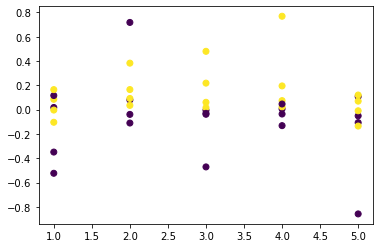

In [44]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=colors)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()